In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
boston = pd.read_csv('housing.csv')

In [3]:
boston.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [4]:
boston.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [5]:
boston.dropna()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


In [6]:
boston.dropna(inplace=True)

In [7]:
boston.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


Text(0.5, 1.0, 'Relation ship between rooms and Price')

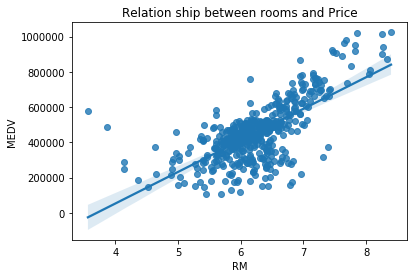

In [8]:
sns.regplot(x='RM', y='MEDV', data=boston, fit_reg=True)
plt.title("Relation ship between rooms and Price")

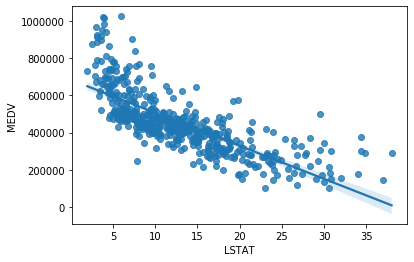

In [9]:
sns.regplot(y='MEDV', x='LSTAT', data=boston, fit_reg=True)

(array([ 21.,  48.,  81., 146.,  96.,  39.,  30.,  13.,   8.,   7.]),
 array([ 105000.,  196980.,  288960.,  380940.,  472920.,  564900.,
         656880.,  748860.,  840840.,  932820., 1024800.]),
 <a list of 10 Patch objects>)

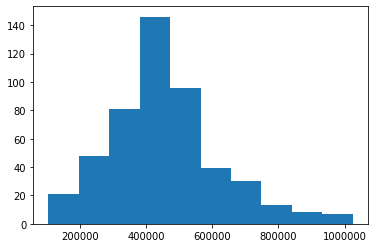

In [10]:
plt.hist(boston.MEDV)

In [11]:
import numpy as np

(array([  2.,   4.,  10.,  25., 122., 178.,  86.,  44.,  11.,   7.]),
 array([3.561 , 4.0447, 4.5284, 5.0121, 5.4958, 5.9795, 6.4632, 6.9469,
        7.4306, 7.9143, 8.398 ]),
 <a list of 10 Patch objects>)

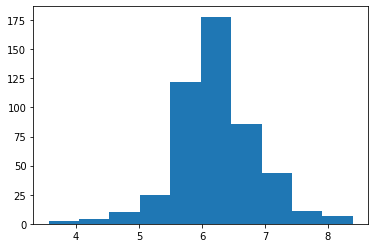

In [12]:
plt.hist(boston.RM)

(array([ 68., 105.,  96.,  84.,  62.,  28.,  21.,  16.,   5.,   4.]),
 array([ 1.98 ,  5.579,  9.178, 12.777, 16.376, 19.975, 23.574, 27.173,
        30.772, 34.371, 37.97 ]),
 <a list of 10 Patch objects>)

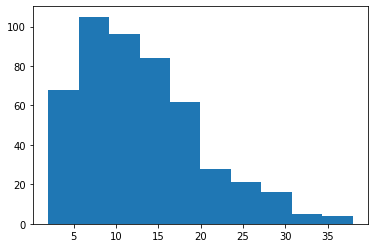

In [13]:
plt.hist(boston.LSTAT)

when the data is spread with large gaps we use normal distribution function (numpy) to create a histogram with normal distribution graph.

In [14]:
boston.columns

Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')

In [15]:
boston_selected_var_df = boston.iloc[:,[0, 1, 2, 3]]

In [16]:
boston_selected_var_df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


Next : Trying to find the relation between the independent variable

In [17]:
boston_selected_var_df.corr()

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.612033,-0.304559,0.697209
LSTAT,-0.612033,1.000000,0.360445,-0.760670
PTRATIO,-0.304559,0.360445,1.000000,-0.519034
MEDV,0.697209,-0.760670,-0.519034,1.000000


In [19]:
boston_selected_var_df["PRICE"] = boston.MEDV

In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [21]:
boston_selected_var_df.head()

,RM,LSTAT,PTRATIO,MEDV,PRICE
0,6.575,4.98,15.3,504000.0,504000.0
1,6.421,9.14,17.8,453600.0,453600.0
2,7.185,4.03,17.8,728700.0,728700.0
3,6.998,2.94,18.7,701400.0,701400.0
4,7.147,5.33,18.7,760200.0,760200.0


ols = Ordinary Least Squared Method which helps in finding unknown parameter in the linear regression
Below we are making a MODEL, which will help us predict the PRICE variable

In [22]:
model = ols('PRICE ~ RM + PTRATIO + LSTAT', boston_selected_var_df).fit()

Additional variable will increase the value of R-squared and Adj R-squared will decrease if the variable is not contributing to the model. 

In [23]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     410.9
Date:                Sat, 31 Oct 2020   Prob (F-statistic):          9.96e-133
Time:                        20:50:07   Log-Likelihood:                -6259.9
No. Observations:                 489   AIC:                         1.253e+04
Df Residuals:                     485   BIC:                         1.254e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.155e+05   6.88e+04      6.035      0.0

Above in the second table we can see that the P>|t| value of all the variable is 0.0 or less than 0.5 which is the only acceptable value to consider in the model

Durbin-Watson stat- checking correlation| value 0-2 = positive autocorrelation | value 2-4 = negetive autocorrelation

In [24]:
predicted_prices = model.fittedvalues

In [25]:
predicted_prices

0      632371.739762
1      525177.148313
2      646753.118080
3      624848.295870
4      611816.592536
           ...      
484    471941.448492
485    437397.202628
486    548818.775678
487    523950.456779
488    442625.539836
Length: 489, dtype: float64

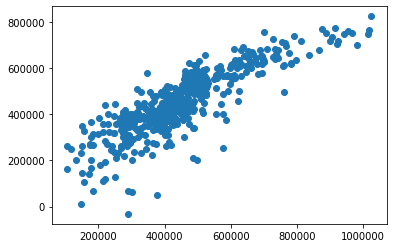

In [27]:
plt.scatter(boston_selected_var_df.PRICE, predicted_prices)

What it indicates?

Since it is in a good (45 degree) momentom between the actual and predicted prices we can use this model. If there were high volume of outliers than it would be less reliable

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
error = np.sqrt(mean_squared_error(boston_selected_var_df.PRICE, predicted_prices))

In [30]:
error

87769.84413151712

Using another method to predict

In [32]:
from sklearn.model_selection import train_test_split
x = boston_selected_var_df.drop('PRICE', axis=1)
y = boston_selected_var_df['PRICE']

In [36]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = .3, random_state=3)

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
linReg = LinearRegression()

In [39]:
linReg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
Y_pred = linReg.predict(X_test)

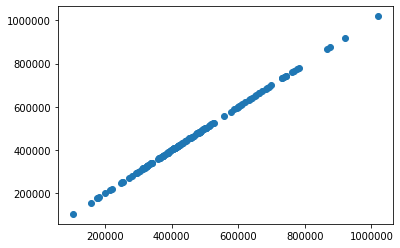

In [41]:
plt.scatter(Y_test, Y_pred)

In [42]:
np.sqrt(mean_squared_error(Y_test, Y_pred))

7.002550740870304e-11